In [249]:
import numpy as np
import pandas as pd
import sympy as sy

In [109]:
r, t, p0, g, k = sy.symbols('r, t, p_0, g, k')

In [13]:
def p(r, t, p0, g, k):
    expr = p0 - g * (-sy.Ei(-r**2/(4*k*t)))
    return expr

In [14]:
p(r, t, p0, g, k)

g*Ei(-r**2/(4*k*t)) + p_0

In [16]:
dp = sy.diff(p(r, t, p0, g, k), t)
dp

-g*exp(-r**2/(4*k*t))/t

In [43]:
p(r, t, p0, g, k).subs(t, 1)

g*Ei(-r**2/(4*k)) + p_0

In [ ]:
params_1 = [(g, 1), (r, 0.1), (k, 1)]

In [33]:
dp_c = dp.subs(params_1)
dp_c

-exp(-0.0025/t)/t

In [72]:
dp_c.

1/4

In [61]:
t

t

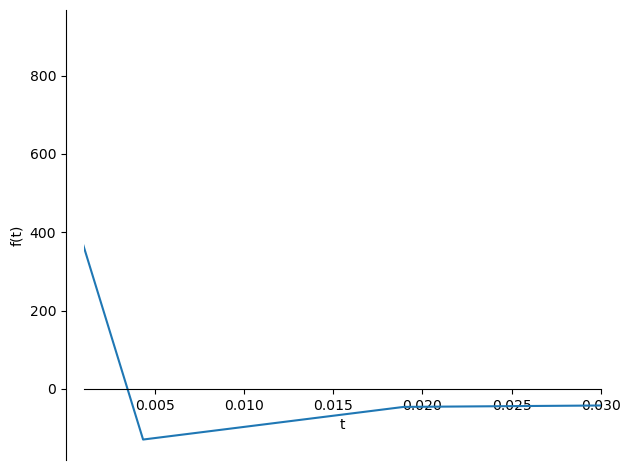

In [101]:
sy.plot(dp_c, xlim=[0.001, 0.03])

В общем виде не получилось. Будем решать асимптотику в виде логарифма

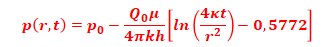

In [107]:
def p(r, t, p0, g, k):
    expr = p0 - g * (sy.ln((4*k*t)/r**2) - 0.5772)
    return expr

In [109]:
r, t, p0, g, k = sy.symbols('r, t, p_0, g, k')

In [110]:
p(r, t, p0, g, k)

-g*(log(4*k*t/r**2) - 0.5772) + p_0

In [111]:
dp = sy.diff(p(r, t, p0, g, k), t)
dp

-g/t

In [114]:
q = sy.Symbol('q')

$ q = -g / t $

$-->$

$ t = -g / q $

In [159]:
params_1 = [(g, 1), (r, 0.1), (k, 0.1), (p0, 100)]

In [160]:
iprf = p(r, t, p0, g, k).subs([(t, g/q)]+params_1)
iprf

100.5772 - log(40.0/q)

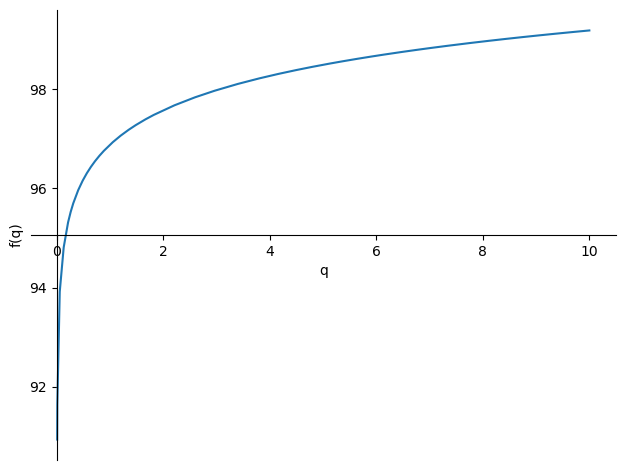

In [161]:
sy.plot(iprf)

In [162]:
iprf.diff(q)

1.0/q

In [169]:
(1/(t+2)).integrate(t)

log(t + 2)

In [174]:
(sy.exp(-2*t-r)).limit(x=r, xlim=sy.oo)

0

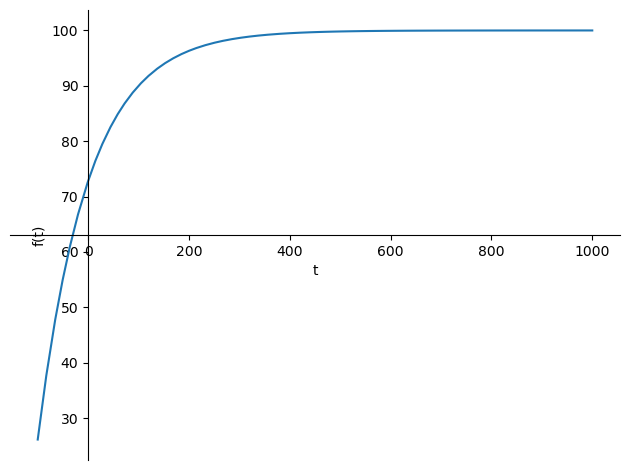

In [253]:
pf = 100 - (100-90)*sy.exp(-(t-100)/0.1/1000)
sy.plot(pf, (t, -100, 1000))

In [242]:
((lambda x: pf.subs(t, x)))

<function __main__.<lambda>(x)>

In [247]:
table = [[x+100, pf.subs(t, x)] for x in np.arange(-100, 1000)]

In [250]:
df = pd.DataFrame(table, columns=['t', 'p'])

In [252]:
df.to_excel('test.xlsx')

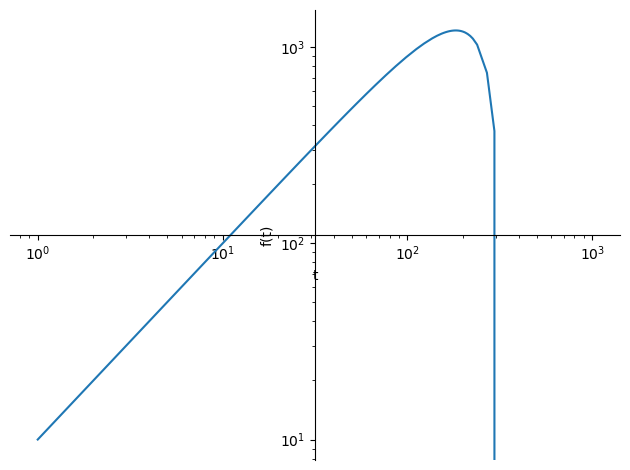

In [288]:
sy.plot(10*t-0.0001*t**3, (t, 1, 1000), xscale='log', yscale='log')

# Тест Dataclass

In [15]:
import json
import os

@dataclass
class Data:
    param1: float
    param2: float
    param3: float
    param4: float
    param5: float
    param6: bool
    param7: bool
    # param8: pd.DataFrame
    param9: int
    param10: int
    param11: int
    param12: int

    def to_dict(self):
        return {
            'param1': self.param1,
            'param2': self.param2,
            'param3': self.param3,
            'param4': self.param4,
            'param5': self.param5,
            'param6': self.param6,
            'param7': self.param7,
            # 'param8': self.param8.to_dict(),
            'param9': self.param9,
            'param10': self.param10,
            'param11': self.param11,
            'param12': self.param12
        }

    def to_json(self):
        return json.dumps(self.to_dict())

    def from_json(cls, json_string):
        json_dict = json.loads(json_string)
        return cls(**{k: v for k, v in json_dict.items() if k in cls.__dict__})

    def from_dict(cls, json_dict):
        return cls(**{k: v for k, v in json_dict.items() if k in cls.__dict__})

data = Data(param1=1.0, 
            param2=2.0, 
            param3=3.0, 
            param4=4.0, 
            param5=5.0, 
            param6=True, 
            param7=False,
            # param8=pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]}), 
            param9=9, 
            param10=10, 
            param11=11, 
            param12=12)

# Запись данных в файл
with open('data.json', 'w') as f:
    json.dump(data.to_json(), f)

# Чтение данных из файла
if os.path.exists('data.json'):
    with open('data.json', 'r') as f:
        json_string = f.read()
    print(json_string)
    data_loaded = Data.from_json(json_string)
    print(data_loaded)


"{\"param1\": 1.0, \"param2\": 2.0, \"param3\": 3.0, \"param4\": 4.0, \"param5\": 5.0, \"param6\": true, \"param7\": false, \"param9\": 9, \"param10\": 10, \"param11\": 11, \"param12\": 12}"


TypeError: from_json() missing 1 required positional argument: 'json_string'

In [2]:
import json
import os

data = Data(param1=1.0, 
            param2=2.0, 
            param3=3.0, 
            param4=4.0, 
            param5=5.0, 
            param6=True, 
            param7=False, 
            param8=pd.DataFrame(), 
            param9=9, 
            param10=10, 
            param11=11, 
            param12=12)

# Запись данных в файл
with open('data.json', 'w') as f:
    json.dump(data.to_json(), f)

# Чтение данных из файла
if os.path.exists('data.json'):
    with open('data.json', 'r') as f:
        json_string = f.read()
    data_loaded = Data.from_json(json_string)
    print(data_loaded)


AttributeError: 'Data' object has no attribute 'to_dict'

In [50]:
import json
import os

@dataclass
class Data:
    param1: float
    param2: float
    param3: float
    param4: float
    param5: float
    param6: bool
    param7: bool
    param8: pd.DataFrame
    param9: int
    param10: int
    param11: int
    param12: int
    
    # @classmethod
    def to_dict(self):
        return {
            'param1': self.param1,
            'param2': self.param2,
            'param3': self.param3,
            'param4': self.param4,
            'param5': self.param5,
            'param6': self.param6,
            'param7': self.param7,
            'param8': self.param8.to_dict(),
            'param9': self.param9,
            'param10': self.param10,
            'param11': self.param11,
            'param12': self.param12
        }
    
    # @classmethod
    def to_json(self):
        return json.dumps(self.to_dict())

    # @classmethod
    # def from_json(cls, json_string):
    #     json_dict = json.loads(json_string)
    #     return cls(**{k: v for k, v in json_dict.items() if k in cls.__dict__})
    
    # @classmethod
    # def from_dict(cls, json_dict):
    #     return cls(**{k: v for k, v in json_dict.items() if k in cls.__dict__})
    
    @classmethod
    def from_dict_data(cls, data_dict):
        return cls(**data_dict)
    
    @classmethod
    def from_json(self, json_string):
        return Data(**json.loads(json_string))
    
    @classmethod
    def from_dict(self, cls, json_dict):
        return cls(**json_dict)

data = Data(param1=1.0, param2=2.0, param3=3.0, param4=4.0, param5=5.0, param6=True, param7=False, param8=pd.DataFrame(), param9=9, param10=10, param11=11, param12=12)

# Запись данных в файл
with open('data.json', 'w') as f:
    json.dump(data.to_json(), f)

# Чтение данных из файла
if os.path.exists('data.json'):
    with open('data.json', 'r') as f:
        json_string = f.read()
    data_loaded = Data.from_json( json_string=json.loads(json_string))
    print(data_loaded)


Data(param1=1.0, param2=2.0, param3=3.0, param4=4.0, param5=5.0, param6=True, param7=False, param8={}, param9=9, param10=10, param11=11, param12=12)


In [37]:
json.loads(json_dict)

{'param1': 1.0,
 'param2': 2.0,
 'param3': 3.0,
 'param4': 4.0,
 'param5': 5.0,
 'param6': True,
 'param7': False,
 'param8': {},
 'param9': 9,
 'param10': 10,
 'param11': 11,
 'param12': 12}

# Новый тип данных

In [91]:
class WbsType:
    def __init__(self, wbs_type):
        print(wbs_type)
        if wbs_type not in ['Затрубное пространство', 'НКТ', 'НКТ+затруб', 'Сжимаемость']:
            print('&')
            raise ValueError("Invalid status. Must be 'Затрубное пространство', 'НКТ', 'НКТ+затруб', 'Сжимаемость'.")
        self.status = wbs_type


In [92]:

@dataclass
class NewData:
    a: WbsType
    

In [93]:
aa = NewData(a='НКТ')

In [94]:
aa.a

'НКТ'

In [95]:
ab = NewData(a='НКb')

In [96]:
ab.a

'НКb'

In [70]:
raise ValueError("Invalid status. Must be 'Затрубное пространство', 'НКТ', 'НКТ+затруб', 'Сжимаемость'.")

ValueError: Invalid status. Must be 'Затрубное пространство', 'НКТ', 'НКТ+затруб', 'Сжимаемость'.

# Plotly

In [97]:
import plotly.graph_objects as go # or plotly.express as px
fig = go.Figure() # or any Plotly Express function e.g. px.bar(...)
# fig.add_trace( ... )
# fig.update_layout( ... )

from dash import Dash, dcc, html

app = Dash()
app.layout = html.Div([
    dcc.Graph(figure=fig)
])

app.run_server(debug=True, use_reloader=False)  # Turn off reloader if inside Jupyter

ModuleNotFoundError: No module named 'dash'

# Контроль изменений параметров

In [111]:
class A:
    def __init__(self, foo=None):
        self._foo = foo
        self._key = 0
    
    @property
    def foo(self):
        """Вызовется при запросе значения из атрибута foo"""
        return self._foo
    
    @foo.setter
    def foo(self, value):
        """Вызовется при присвоении значения атрибуту foo"""
        self._foo = value
        self.__bar()  # Выполняем нужные действия после присвоения
    
    def __bar(self):
        print('произошло присвоение')
        print(self._key)





In [117]:
a = A(5)
# a.foo = 5

In [113]:
a.foo = 7

произошло присвоение
0


In [115]:
a._foo = 5

# Foot